<table>
   <tr>     
    <td><img src="./images/logo-qiskit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left"></td>
    <td>  </td>
    <td><img src="./images/logo-IBM.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left"></td>
   </tr>
</table>
<br>


# <center>Welcome </center>
# <center> Lab-1 : Discovery </center>




<div class="alert alert-block alert-info">

# 1. Crash course : using qiskit and IBM backends
</div>


### Setup

- Install qiskit using the installation guide in qiskit.org : https://qiskit.org/documentation/install.html

(it is recommended to install Anaconda first, and create a conda environement, in which you will install qiskit. 
This will take care of all the needed features, such as matplotlib used for visualization tools).


Verify the following cell runs error free : 


In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.45.0', 'qiskit-aer': '0.13.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### 1.a Building your first circuit

Let's build a circuit to generate first Bell State $\frac{1}{\sqrt{2}}(|00\rangle +|11\rangle)$

We will need 2 qubits to compute, and two cbits to read the result into, so we need to import `QuantumCircuit`, `QuantumRegister` and `ClassicalRegister`and construct instances of those.

Note about the first Bell state : 


<img src="./images/bell-state.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">



this is done using 2 qubits, system starts in state |00⟩ (both $q_0$ and $q_1$ in state |0⟩).
Then $q_0$ goes through Hadamard and gets into equal superposition of |0⟩ and |1⟩. 

Then $q_0$ and $q_1$ go through the CNOT gate (control not, the state of $q_0$ controls a NOT gate on $q_1$. 

After $q_0$ controls $q_1$, the state of $q_1$ is in a superposition of |0⟩ & |1⟩, ($q_1$ stays at |0⟩ when $q_0$ is |0⟩, and $q_1$ goes to |1⟩ when $q_0$ is |1⟩).

So : both $q_0$ and $q_1$ are in |0⟩ state (system is in state |00⟩) or both $q_0$ and $q_1$ are in |1⟩ (system is in state |11⟩).

Our system is in equal superposition of |00⟩ and |11⟩.

The two qubits are entangled together : if you measure any one of the qubits, you immediately know the state of the other !

### First import the needed elements

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

Then create the registers, of size 2, then the circuit using those registers (you may also create a circuit with implicit registers, there will be some examples later)

c:\Users\aurel\.conda\envs\deeplearning\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


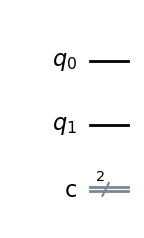

In [3]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')

qc = QuantumCircuit(qr,cr)

qc.draw(output='mpl')

We can now "build" our circuit, by adding "gates" to the qubits: 

In this example we will need an hadamard gate on qubit 0, and a Cx gate from qubit 0 to qubit 1 

Gates will be method applied to the quantum circuit : 

`qc.h(qr[0])`

`qc.cx(qr[0],qr[1])`

You can refer to the documentation on qiskit.org, or type `dir(qc)` to view the valid methods on that object type. And then Python `help(obj.method)` gives you more information.


In [4]:
dir(qc)

['__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_ancillas',
 '_append',
 '_base_name',
 '_calibrations',
 '_check_dups',
 '_clbit_indices',
 '_clbits',
 '_control_flow_scopes',
 '_create_creg',
 '_create_qreg',
 '_data',
 '_global_phase',
 '_increment_instances',
 '_layout',
 '_metadata',
 '_name_update',
 '_op_start_times',
 '_parameter_table',
 '_parameters',
 '_peek_previous_instruction_in_scope',
 '_pop_previous_instruction_in_scope',
 '_pop_scope',
 '_push_scope',
 '_qubit_indices',
 '_qubits',
 '_resolve_classical_resource',
 '_unroll_param_dict',
 '_unsorted_paramete

In [5]:
help(qc.cnot)

Help on method cnot in module qiskit.circuit.quantumcircuit:

cnot(control_qubit: 'QubitSpecifier', target_qubit: 'QubitSpecifier', label: 'str | None' = None, ctrl_state: 'str | int | None' = None) -> 'InstructionSet' method of qiskit.circuit.quantumcircuit.QuantumCircuit instance
    Apply :class:`~qiskit.circuit.library.CXGate`.
    
    For the full matrix form of this gate, see the underlying gate documentation.
    
    .. deprecated:: 0.45.0
      The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
    
    
    Args:
        control_qubit: The qubit(s) used as the control.
        target_qubit: The qubit(s) targeted by the gate.
        label: The string label of the gate in the circuit.
        ctrl_state:
            The control state in decimal, or as a bitstring (e.g. '1').  Defaults to controlling
            on 

In [6]:
# bell state


For small circuits, it can be very usefull to "draw" the circuit while you build it: 

`.draw()` accept `output=` styles : mpl, latex, latex_source, text(=default), ...

In [7]:
from qiskit import execute

Before we execute, we need to make sure we perform a measurement at the end: 

Now we have a circuit, we are ready for execution , we still need : 
    
- to import `execute()` method,



- to decide where we want the circtui to be executed, we will call this a backend, it can be : the local simulator included with the qiskit library `qasm_simulator`, a simulator on the Cloud : `ibmq_qasm_simulator`or a real physical device on IBM Cloud as well, such as `ibmq_athens`. 

Let's first use the local simulator, for this we need to import Aer for simulator functions


   

### 1.b Executing on local simulator




In [8]:
from qiskit import Aer

#print(Aer.backends()) # ou de manière plus jolie : 
backend_list  = Aer.backends()
for be in backend_list:
    print(be)


AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


For now, we want to use `qasm_simulator` which emulates a physical backend, so let's get it : 

In [9]:
backend = Aer.get_backend('qasm_simulator')

Now let's create our "job" to execute, `.execute()` requires that we pass the circuit and the backend (there are a number of optionnal argument, we will discuss "shots" soon : 

In [10]:
job = execute(qc,backend,shots=10)

In [11]:
print(job)

Extracting results

In [12]:
my_results = job.result()

In [13]:
print(my_results)

Result(backend_name='qasm_simulator', backend_version='0.13.0', qobj_id='', job_id='6ba44f96-972c-4df3-b543-295071632ead', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-158', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=547238575, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 0, 'num_clbits': 2, 'time_taken': 2.07e-05, 'input_qubit_map': [], 'max_memory_mb': 16145, 'measure_sampling': False, 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1}, time_taken=2.07e-05)], date=2023-12-12T09:32:30.818367, status=COMPLETED, header=None, metadata={'omp_enabled': True, 'parallel_experiments': 1, 'max_memory_mb': 16145, 'max

Reading results :

In [14]:
print(my_results.get_counts())

QiskitError: 'No counts for experiment "0"'

notes : 
- results are stored in a Python dictionnary, keys are the measurement basis, values are the number of times the measurement collapsed to that particular basis.
- the circuit has been run 1024 time, this is the default value for the keword parameter `shots`in `.execute()`. 

You can try values from `shots=1` to `shots=8192`

In [ ]:
# with shots=1, you will get a count of 1 either on 00 or on 11
job = execute(qc,backend, shots=11)
my_results = job.result()
print(my_results.get_counts(qc))

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001F090341D90>"'

It is also usefull to be able to visualize the results on a bar chart : 

In [ ]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_results.get_counts(qc))

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001F090341D90>"'

On more thing about reading results. We get used to enumerate qubits from top to bottom of a circuit, $q_0, q_1, ... , q_n$. The measurement will code multiple qubits in a binary register this way $q_n,..., q_1, q0$, in other words $q_0$ is the least significant bit. 


Let's see the following experiment, using $X$ (not) and $id$ (identity):  

In [18]:
qr = QuantumRegister(8,'q')
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.ccx(qr[0],qr[1],qr[4])
qc.ccx(qr[2],qr[4],qr[5])
qc.ccx(qr[3],qr[5],qr[6])
qc.cx(qr[6],qr[7])
qc.ccx(qr[3],qr[5],qr[6])
qc.ccx(qr[2],qr[4],qr[5])
qc.ccx(qr[0],qr[1],qr[4])
qc.draw()

q_0: ──■─────────────────────────────■──
        │                             │  
 q_1: ──■─────────────────────────────■──
        │                             │  
 q_2: ──┼────■───────────────────■────┼──
        │    │                   │    │  
 q_3: ──┼────┼────■─────────■────┼────┼──
      ┌─┴─┐  │    │         │    │  ┌─┴─┐
 q_4: ┤ X ├──■────┼─────────┼────■──┤ X ├
      └───┘┌─┴─┐  │         │  ┌─┴─┐└───┘
 q_5: ─────┤ X ├──■─────────■──┤ X ├─────
           └───┘┌─┴─┐     ┌─┴─┐└───┘     
 q_6: ──────────┤ X ├──■──┤ X ├──────────
                └───┘┌─┴─┐└───┘          
 q_7: ───────────────┤ X ├───────────────
                     └───┘               
c2: 2/═══════════════════════════════════

In this case we will measure a state correspondding to $q_0 = 1$ and $q_1= 0$, in the form $q_1q_0 = 01$

In [ ]:
# with shots=1, you will get a count of 1 either on 00 or on 11
job = execute(qc,backend, shots=1024)
my_results = job.result()
print(my_results.get_counts(qc))

{'11': 342, '01': 326, '00': 356}


### 1.c Executing on a physical backend




Let's restart with the Bell State circuit 

c:\Users\aurel\.conda\envs\deeplearning\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


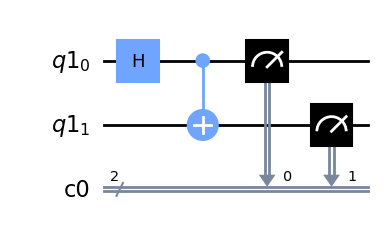

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw(output='mpl')


`qc` is ready !

In [ ]:
# IBMQ for access to online devices and helps manage your IBM Q account data from your workstation. 
from qiskit import IBMQ

If you never used your API key before, go to IBM Quantum Experience on the web, register for free with your email or Google, Twitter... account. Totally free. 

Go to my accoung and copy your API token, paste it below. It will be saved on your disk for later use.

The token is used to manage "fair share" : you are allowed to submit 5 jobs per day to a real quantum computer. When you submit more jobs, your priority in the queue will be degraded. 

In [ ]:
MY_API_TOKEN= 'e098ca2ae082e504c79041256debba63232c6244b8fdf6055122920e647cbf2f0895306aa9f5b07e162f3e908beb4be00d24d110123ac6da090a0be8605cf653'
IBMQ.save_account(MY_API_TOKEN, overwrite=True)

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# choose one available provider
selected_provider = IBMQ.get_provider(hub='ibm-q')

In [ ]:
# list backends available for this provider
selected_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
# small program to get backends configs and status
# using least_busy() is more straightforward, this is to show
# how we get info from the provider's backends

sp = IBMQ.get_provider(hub='ibm-q')   # selected provider

backends_set = set()
for b in selected_provider.backends():
    backends_set.add(str(b))
   
print("backend name                    queue qubits operational status message")
print("------------------------------- ----- ------ ----------- --------------")
for b in backends_set: 
    be = sp.get_backend(b)
    pj = be.status().pending_jobs
    qb = be.configuration().n_qubits
    op = be.status().operational 
    sm = be.status().status_msg
    print(f"{b:32} {pj:4} {qb:6}{op:12} {sm:6}")
print("------------------------------ ----- ------ ----------- --------------")

backend name                    queue qubits operational status message
------------------------------- ----- ------ ----------- --------------
ibmq_qasm_simulator                 0     32           1 active
simulator_mps                       0    100           1 active
simulator_stabilizer                0   5000           1 active
simulator_statevector               0     32           1 active
ibm_brisbane                      273    127           1 active
ibm_lagos                          35      7           1 active
simulator_extended_stabilizer       0     63           1 active
ibm_perth                        1277      7           1 active
ibm_nairobi                        34      7           1 active
------------------------------ ----- ------ ----------- --------------


You can also automate your backend selection, using `least_busy` : 

In [ ]:
backend = sp.get_backend('ibmq_quito')
backend.name()

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
# we want more than 1 qubit (we need 2), on an operationnal backend which is not a simulator
from qiskit.providers.ibmq import least_busy

backend = least_busy(sp.backends(filters = lambda x: x.configuration().n_qubits >= 2 and 
                                       not x.configuration().simulator and x.status().operational == True))

print("least busy backend: ", backend)

least busy backend:  ibm_nairobi


In [ ]:
# execution
from qiskit.tools.monitor import job_monitor

job = execute(qc,backend)
print(job.job_id())
job_monitor(job)

cn92nxft2wq0008c5bg0
Job Status: job is queued (None)

KeyboardInterrupt: 

In [ ]:
res = job.result()
from qiskit.tools.visualization import plot_histogram

d = (res.get_counts(qc))
d

In [ ]:
plot_histogram(d)

<div class="alert alert-block alert-info">

# 2. Try it yourself

</div>

##  CONTROL-CONTROL-NOT, CCNOT, ccx, aka Toffoli gate

### if a = 1 and b = 1, then flip c
<img src="./images/Toffoli.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

control-control-not syntax : 

`<circuit>.ccx(control_qubitA, control_qubitB, target_qubit)`

Build a circuit, and run it using non trival input values


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


In [ ]:
# with shots=1, you will get a count of 1 either on 00 or on 11
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend)
my_results = job.result()
print(my_results.get_counts(qc))

{'11': 505, '00': 519}


##  CONTROL-SWAP aka Fredkin gate


### if a = 1 then swap b and c states.
<img src="./images/Fredkin.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">
Notes: 
 
    

control-swap syntax: 

`<circuit>.cswap(control_qubit, swapped_qubit, swapped_qubit)`

Build a circuit, and run it using non trival input values


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer





In [ ]:
# with shots=1, you will get a count of 1 either on 00 or on 11
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend)
my_results = job.result()
print(my_results.get_counts(qc))

{'00': 549, '11': 475}
